# Fourier Series

## Contents

- [TBD](#tbd)

## TBD

In [65]:
using Integrals, Plots

function FS_analysis(fx_vec, x_vec; N=20)
    p = x_vec[end] - x_vec[1]
    n_vec = 0:N-1
    an_vec = zeros(N)
    bn_vec = zeros(N)
    for (i_n, n) in enumerate(n_vec)
        problem = SampledIntegralProblem((@. fx_vec * cos((2*pi*n/p)*x_vec)), x_vec)
        sol = solve(problem, TrapezoidalRule()) 
        an_vec[i_n] = 2/p * sol.u
        problem = SampledIntegralProblem((@. fx_vec * sin((2*pi*n/p)*x_vec)), x_vec)
        sol = solve(problem, TrapezoidalRule())
        bn_vec[i_n] = 2/p * sol.u
    end
    return an_vec, bn_vec, n_vec
end

function FS_synthesis(an_vec, bn_vec, p)
    f(x) = an_vec[1]/2 + sum( an_vec[n+1]*cos((2*pi*n/p)*x) + bn_vec[n+1]*sin((2*pi*n/p)*x) for n in range(1, length(bn_vec)-1) )
end

FS_synthesis (generic function with 1 method)

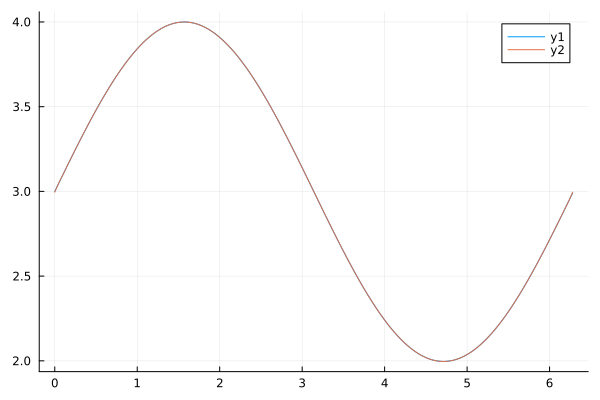

In [100]:
x_vec = 0:0.01:2*pi
fx_vec = sin.(x_vec) + 3*cos.(0.01*x_vec)
plt = plot(x_vec, fx_vec)

an_vec, bn_vec, n_vec = FS_analysis(fx_vec, x_vec; N=50);

p = x_vec[end] - x_vec[1]
f_FS = FS_synthesis(an_vec, bn_vec, p)
plot!(plt, x_vec, f_FS.(x_vec))